# Load and Explore the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set the style for matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")

In [2]:
# Find the most recent data files
data_dir = '../data/'
products_files = [f for f in os.listdir(data_dir) if f.startswith('products_')]
sales_files = [f for f in os.listdir(data_dir) if f.startswith('sales_')]
inventory_files = [f for f in os.listdir(data_dir) if f.startswith('inventory_')]
combined_files = [f for f in os.listdir(data_dir) if f.startswith('combined_data_')]

# Sort by timestamp to get the most recent
products_file = sorted(products_files)[-1]
sales_file = sorted(sales_files)[-1]
inventory_file = sorted(inventory_files)[-1]
combined_file = sorted(combined_files)[-1]

# Load the datasets
products_df = pd.read_csv(os.path.join(data_dir, products_file))
sales_df = pd.read_csv(os.path.join(data_dir, sales_file))
inventory_df = pd.read_csv(os.path.join(data_dir, inventory_file))
combined_df = pd.read_csv(os.path.join(data_dir, combined_file))

# Convert date columns to datetime
sales_df['date'] = pd.to_datetime(sales_df['date'])
inventory_df['date'] = pd.to_datetime(inventory_df['date'])
inventory_df['expected_delivery'] = pd.to_datetime(inventory_df['expected_delivery'])
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [3]:
# Display basic information about the datasets
print("Products Dataset:")
print(f"Shape: {products_df.shape}")
display(products_df.head())
print("\nProduct Categories:")
display(products_df['category'].value_counts())

print("\nSales Dataset:")
print(f"Shape: {sales_df.shape}")
display(sales_df.head())

print("\nInventory Dataset:")
print(f"Shape: {inventory_df.shape}")
display(inventory_df.head())

Products Dataset:
Shape: (10, 11)


product_id        product_name     category  price  holding_cost_rate  \
0       P001  Electronics Item 1  Electronics  81.00           0.191001   
1       P002   Home Goods Item 2   Home Goods  40.64           0.165373   
2       P003   Home Goods Item 3   Home Goods  44.41           0.183214   
3       P004         Food Item 4         Food   9.11           0.235766   
4       P005         Food Item 5         Food  11.39           0.255186   

   stockout_cost_rate  setup_cost  lead_time_mean  lead_time_std  \
0            0.472321   52.364712               7              2   
1            0.378613   30.612112               6              2   
2            0.424754   27.038993               6              2   
3            0.631619   13.806631               3              1   
4            0.636855   15.689195               3              1   

  seasonal_pattern  trend_factor  
0           weekly          -0.2  
1           weekly          -0.1  
2           yearly           0.1  
3          monthly          -0.2  
4           weekly          -0.2


Product Categories:


category
Home Goods     3
Food           3
Electronics    2
Clothing       2
Name: count, dtype: int64


Sales Dataset:
Shape: (7300, 5)


date product_id  demand  unit_price  total_sales
0 2022-01-01       P001      65       81.00      5265.00
1 2022-01-01       P002      70       40.64      2844.80
2 2022-01-01       P003      40       44.41      1776.40
3 2022-01-01       P004      59        9.11       537.49
4 2022-01-01       P005      68       11.39       774.52


Inventory Dataset:
Shape: (12742, 8)


date product_id event_type  quantity expected_delivery  cost stockout  \
0 2022-01-01       P001  inventory        35               NaT  1.48    False   
1 2022-01-01       P002  inventory        30               NaT  0.55    False   
2 2022-01-01       P003  inventory        60               NaT  1.34    False   
3 2022-01-01       P004  inventory        41               NaT  0.24    False   
4 2022-01-01       P005  inventory        32               NaT  0.25    False   

   stockout_cost  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0


Sales Statistics:


date       demand   unit_price  total_sales
count                 7300  7300.000000  7300.000000  7300.000000
mean   2022-12-31 12:00:00    47.608082    39.615000  1892.170342
min    2022-01-01 00:00:00    13.000000     9.110000   127.540000
25%    2022-07-02 00:00:00    39.000000    11.390000   572.930000
50%    2022-12-31 12:00:00    46.000000    36.545000  1687.580000
75%    2023-07-02 00:00:00    55.000000    44.410000  2673.000000
max    2023-12-31 00:00:00   121.000000    95.210000  7426.380000
std                    NaN    12.231653    27.462765  1345.125094


Demand Statistics by Product:


product_id       mean        std  min  max
0       P001  42.604110  10.518296   14   89
1       P002  48.421918   9.283823   22   95
2       P003  54.838356  13.761685   19  112
3       P004  39.856164  10.116733   14   86
4       P005  43.147945  10.585987   13   88
5       P006  59.383562  13.696124   21  121
6       P007  44.742466   7.595897   16   81
7       P008  45.146575   9.908035   19   78
8       P009  48.057534   8.793281   20   92
9       P010  49.882192  12.644548   19   93

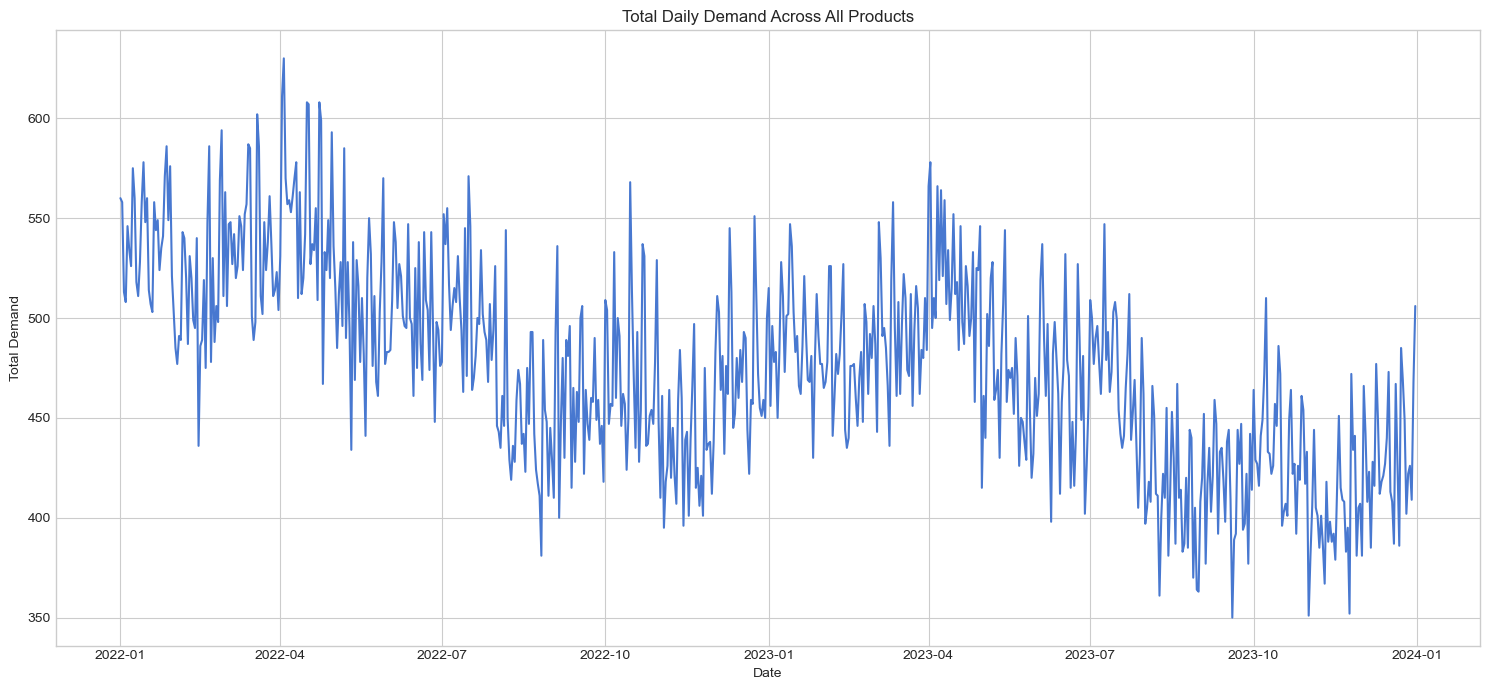

In [4]:
# Basic statistics for the sales dataset
print("\nSales Statistics:")
display(sales_df.describe())

# Basic statistics for each product
print("\nDemand Statistics by Product:")
product_stats = sales_df.groupby('product_id')['demand'].agg(['mean', 'std', 'min', 'max']).reset_index()
display(product_stats)

# Let's look at sales over time
plt.figure(figsize=(15, 7))
# Group by date and sum the demand across all products
daily_sales = sales_df.groupby('date')['demand'].sum().reset_index()
plt.plot(daily_sales['date'], daily_sales['demand'])
plt.title('Total Daily Demand Across All Products')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

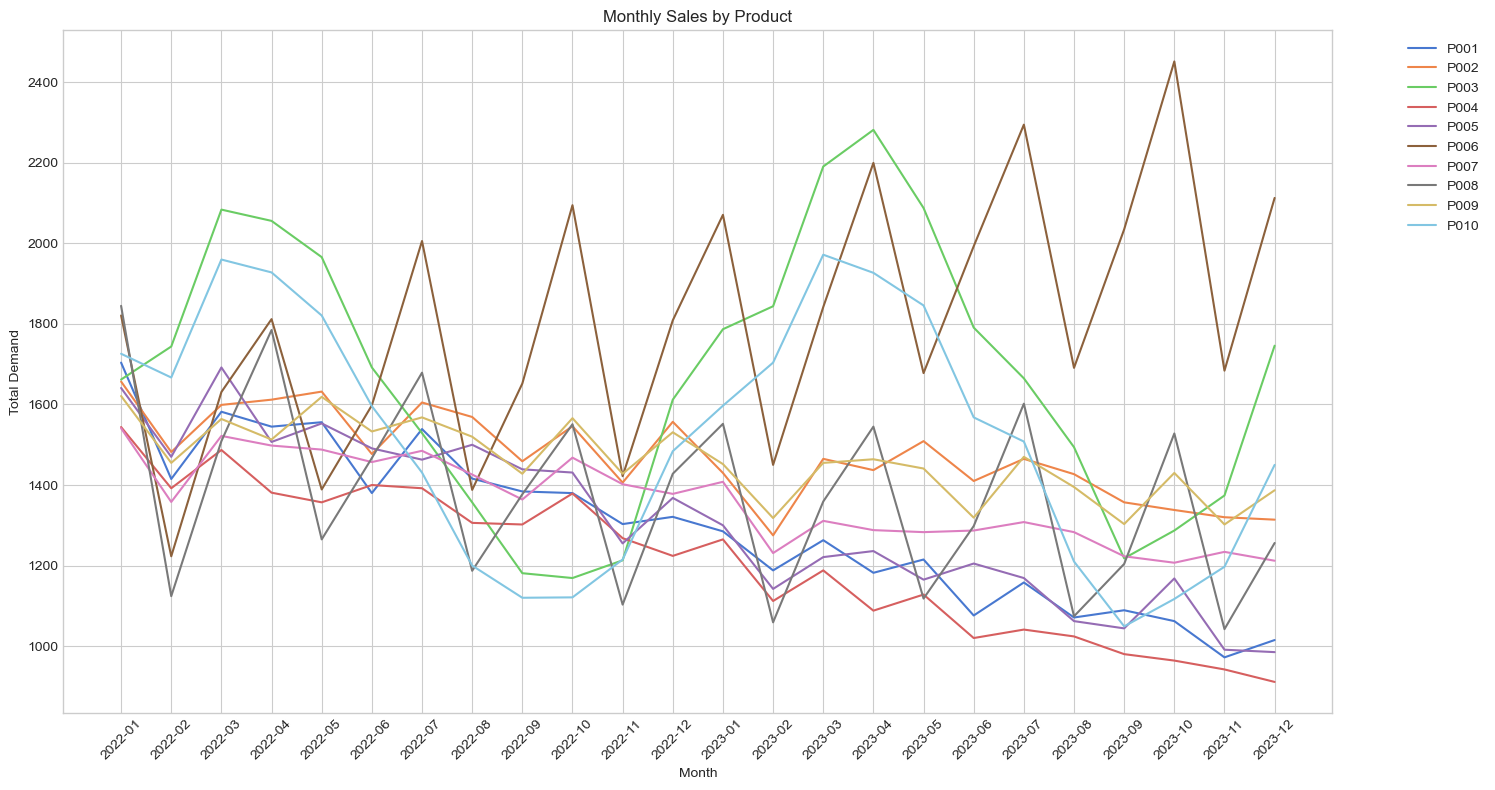

In [5]:
# Aggregate sales by month
sales_df['month'] = sales_df['date'].dt.to_period('M')
monthly_sales = sales_df.groupby(['month', 'product_id'])['demand'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Plot monthly sales for each product
plt.figure(figsize=(15, 8))
for product_id in products_df['product_id']:
    product_sales = monthly_sales[monthly_sales['product_id'] == product_id]
    plt.plot(product_sales['month'], product_sales['demand'], label=product_id)

plt.title('Monthly Sales by Product')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

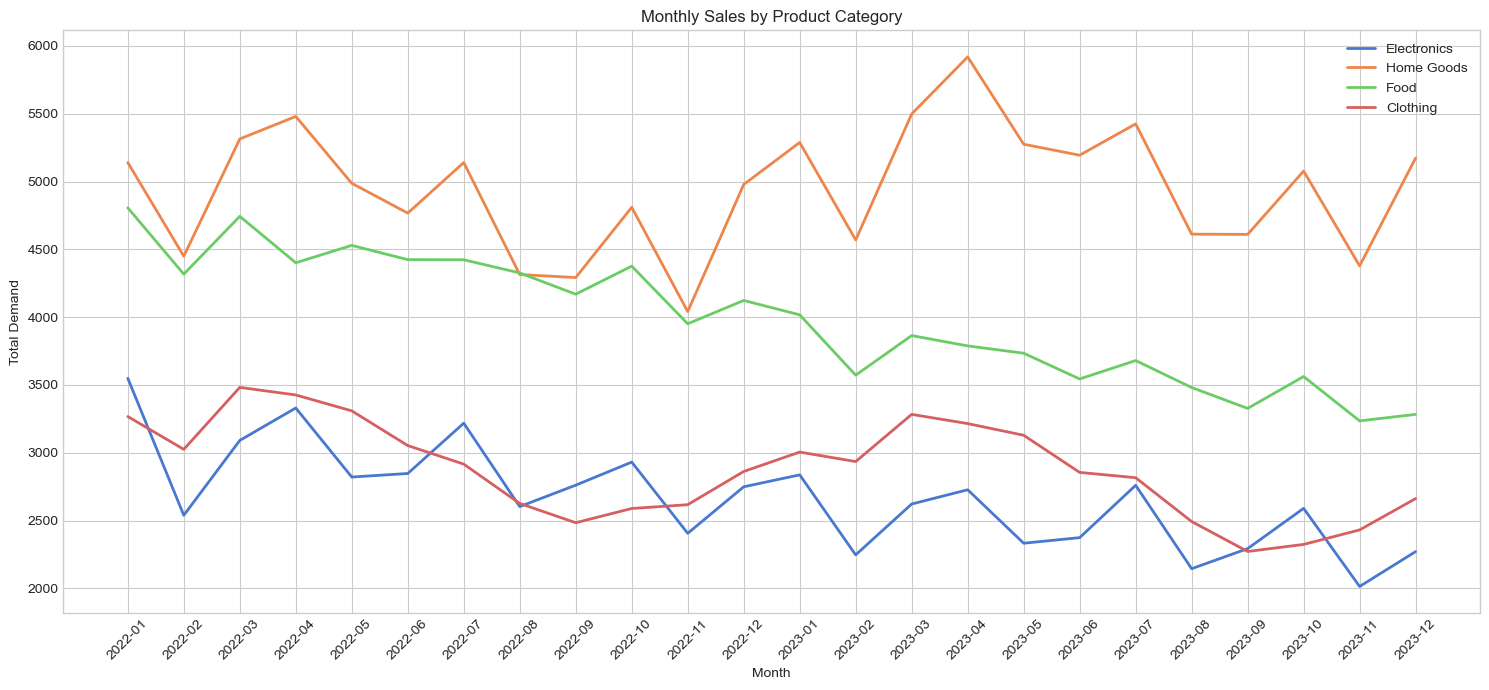

In [6]:
# Sales by category
combined_df['month'] = combined_df['date'].dt.to_period('M')
category_sales = combined_df.groupby(['month', 'category'])['demand'].sum().reset_index()
category_sales['month'] = category_sales['month'].astype(str)

plt.figure(figsize=(15, 7))
for category in products_df['category'].unique():
    cat_sales = category_sales[category_sales['category'] == category]
    plt.plot(cat_sales['month'], cat_sales['demand'], label=category, linewidth=2)

plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

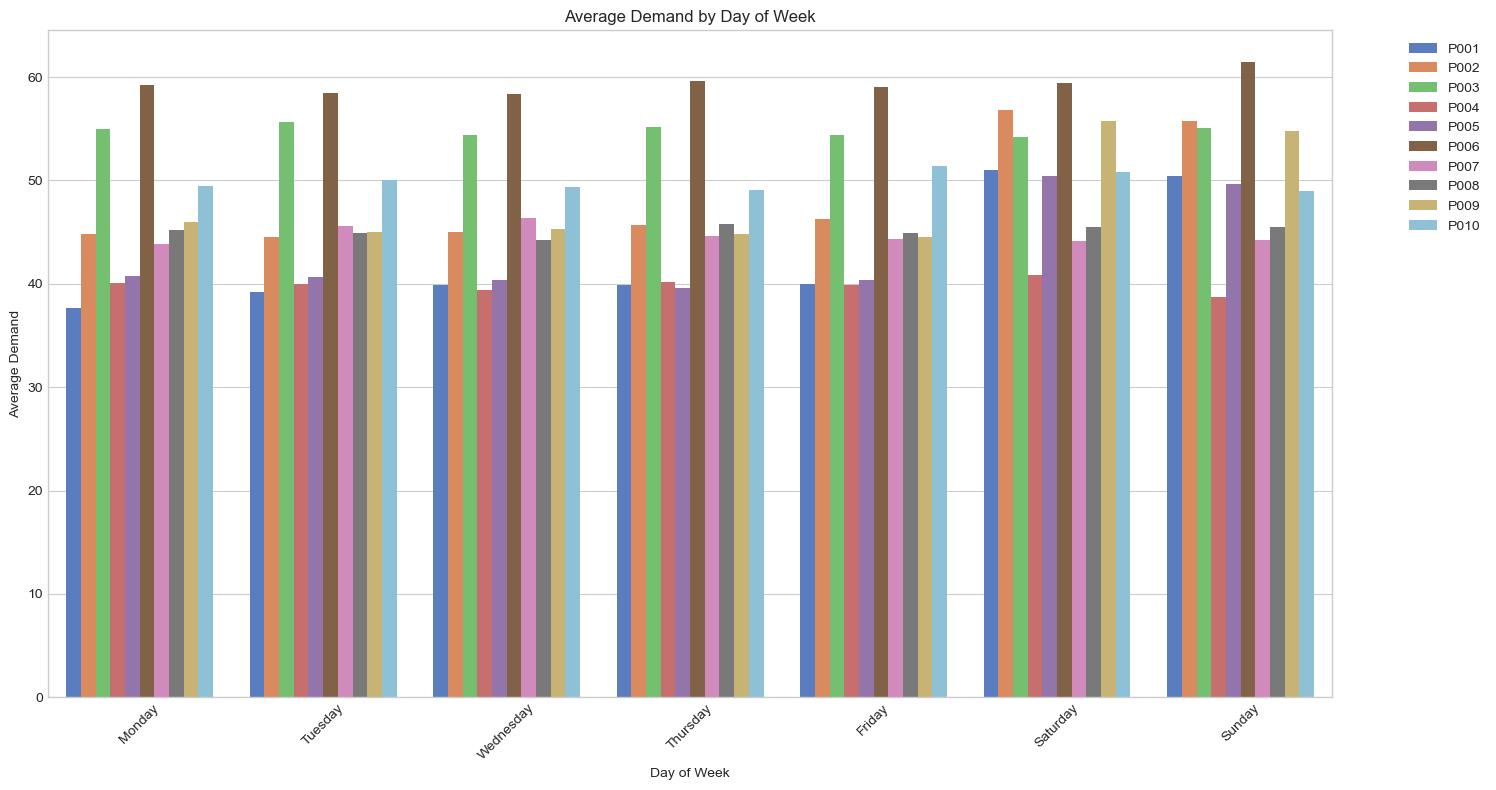

In [7]:
# Analyze seasonal patterns
# Create a day of week feature
sales_df['day_of_week'] = sales_df['date'].dt.dayofweek
sales_df['is_weekend'] = sales_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
sales_df['month_of_year'] = sales_df['date'].dt.month
sales_df['quarter'] = sales_df['date'].dt.quarter

# Calculate average demand by day of week
dow_demand = sales_df.groupby(['product_id', 'day_of_week'])['demand'].mean().reset_index()
dow_demand['day_name'] = dow_demand['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Plot demand by day of week for each product
plt.figure(figsize=(15, 8))
sns.barplot(x='day_name', y='demand', hue='product_id', data=dow_demand)
plt.title('Average Demand by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

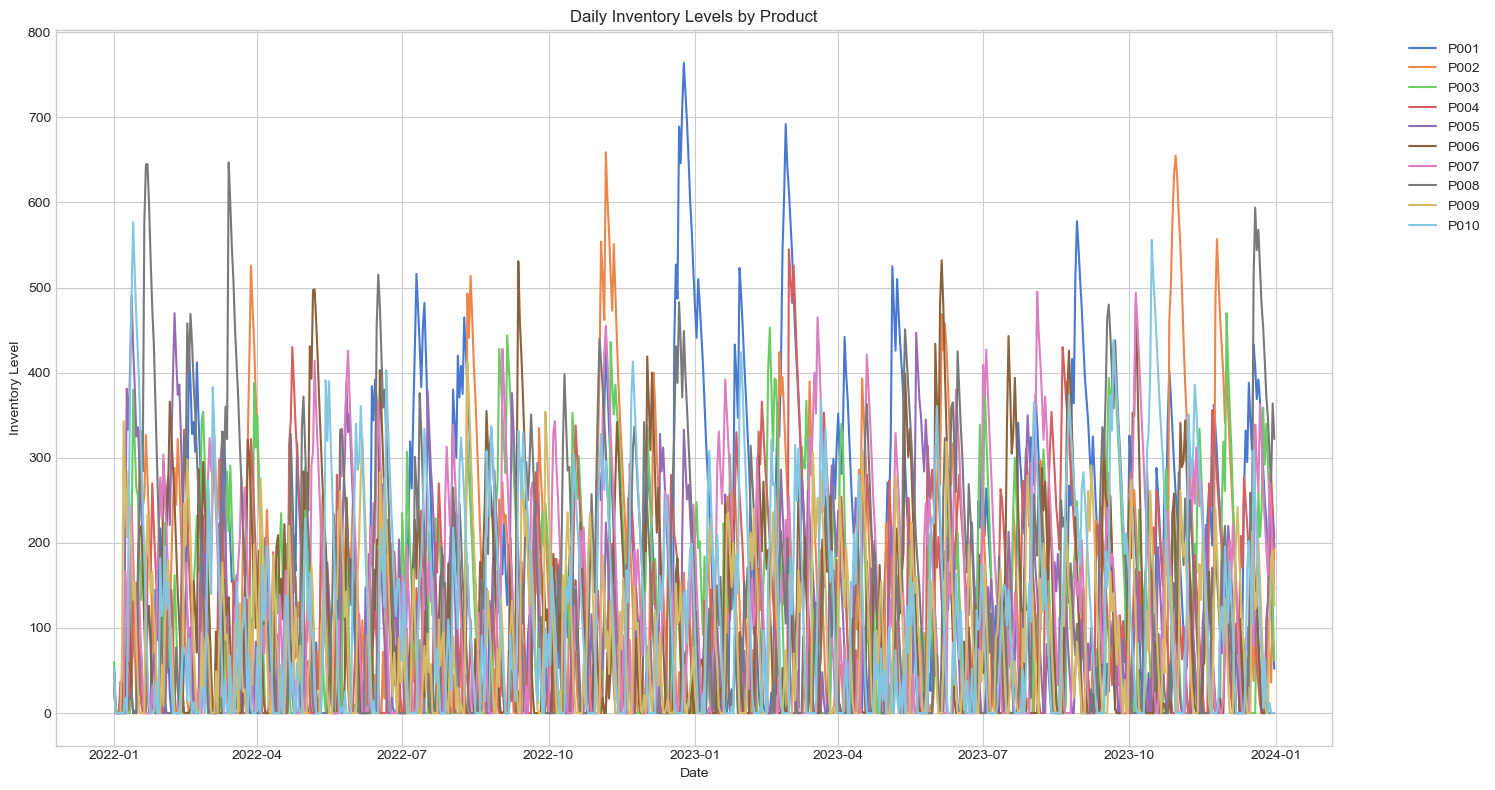

In [8]:
# Analyze inventory levels over time
# Filter for just inventory records
inventory_levels = inventory_df[inventory_df['event_type'] == 'inventory']

# Plot inventory levels for each product
plt.figure(figsize=(15, 8))
for product_id in products_df['product_id']:
    product_inventory = inventory_levels[inventory_levels['product_id'] == product_id]
    plt.plot(product_inventory['date'], product_inventory['quantity'], label=product_id)

plt.title('Daily Inventory Levels by Product')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

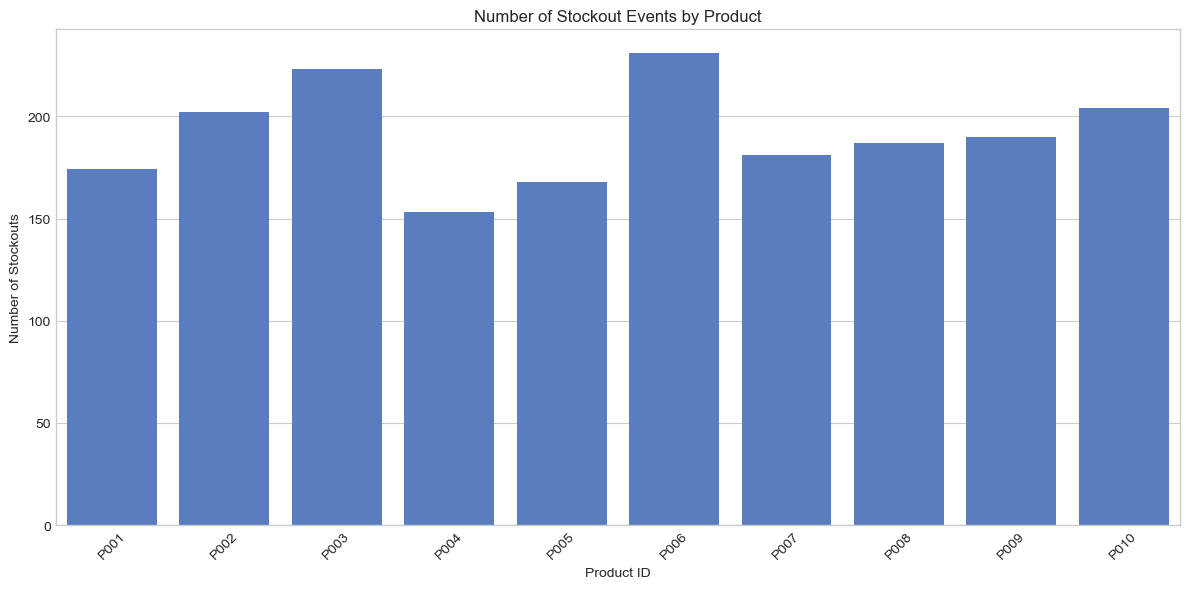

In [9]:
# Analyze stockouts
stockouts = inventory_levels[inventory_levels['stockout'] == True]
stockout_counts = stockouts.groupby('product_id')['stockout'].count().reset_index()
stockout_counts.columns = ['product_id', 'number_of_stockouts']

plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='number_of_stockouts', data=stockout_counts)
plt.title('Number of Stockout Events by Product')
plt.xlabel('Product ID')
plt.ylabel('Number of Stockouts')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

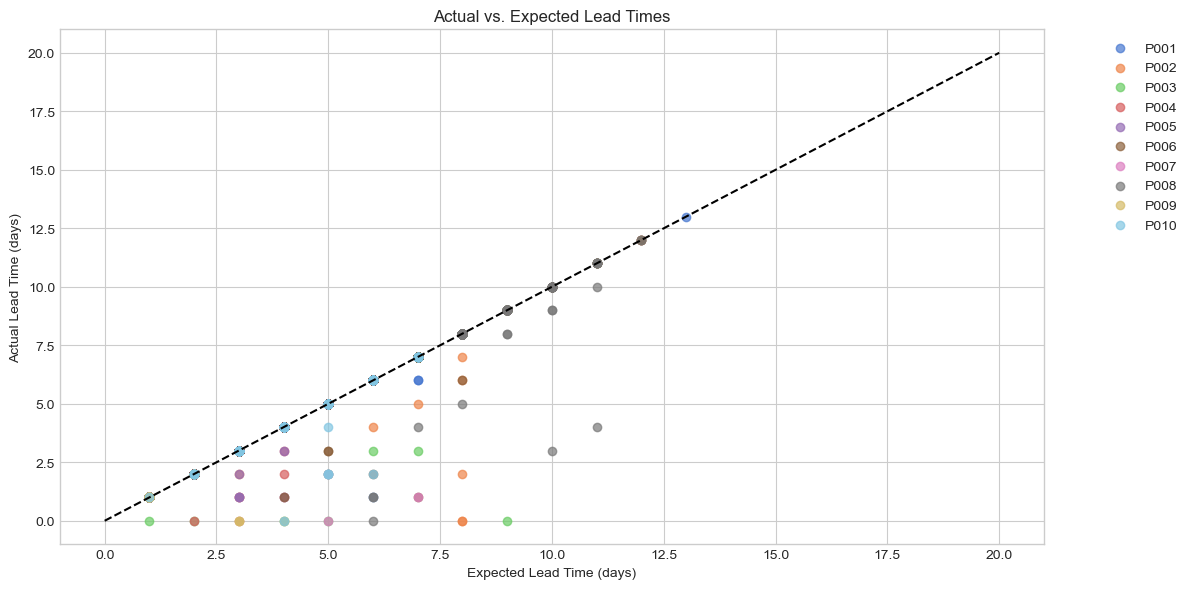

In [10]:
# Analyze lead times
reorders = inventory_df[inventory_df['event_type'] == 'reorder']
deliveries = inventory_df[inventory_df['event_type'] == 'delivery']

# For each reorder, find the corresponding delivery
reorder_delivery_pairs = []

for _, reorder in reorders.iterrows():
    product_id = reorder['product_id']
    reorder_date = reorder['date']
    quantity = reorder['quantity']
    expected_delivery = reorder['expected_delivery']
    
    # Find the matching delivery
    matching_delivery = deliveries[
        (deliveries['product_id'] == product_id) & 
        (deliveries['quantity'] == quantity) &
        (deliveries['date'] >= reorder_date)
    ].sort_values('date').iloc[0] if not deliveries[
        (deliveries['product_id'] == product_id) & 
        (deliveries['quantity'] == quantity) &
        (deliveries['date'] >= reorder_date)
    ].empty else None
    
    if matching_delivery is not None:
        actual_delivery = matching_delivery['date']
        lead_time = (actual_delivery - reorder_date).days
        
        reorder_delivery_pairs.append({
            'product_id': product_id,
            'reorder_date': reorder_date,
            'expected_delivery': expected_delivery,
            'actual_delivery': actual_delivery,
            'expected_lead_time': (expected_delivery - reorder_date).days,
            'actual_lead_time': lead_time,
            'lead_time_difference': lead_time - (expected_delivery - reorder_date).days
        })

lead_times_df = pd.DataFrame(reorder_delivery_pairs)

# Plot actual vs. expected lead times
plt.figure(figsize=(12, 6))
for product_id in products_df['product_id']:
    product_lead_times = lead_times_df[lead_times_df['product_id'] == product_id]
    if not product_lead_times.empty:
        plt.scatter(product_lead_times['expected_lead_time'], 
                   product_lead_times['actual_lead_time'], 
                   label=product_id, alpha=0.7)

plt.plot([0, 20], [0, 20], 'k--')  # Diagonal line where expected = actual
plt.title('Actual vs. Expected Lead Times')
plt.xlabel('Expected Lead Time (days)')
plt.ylabel('Actual Lead Time (days)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

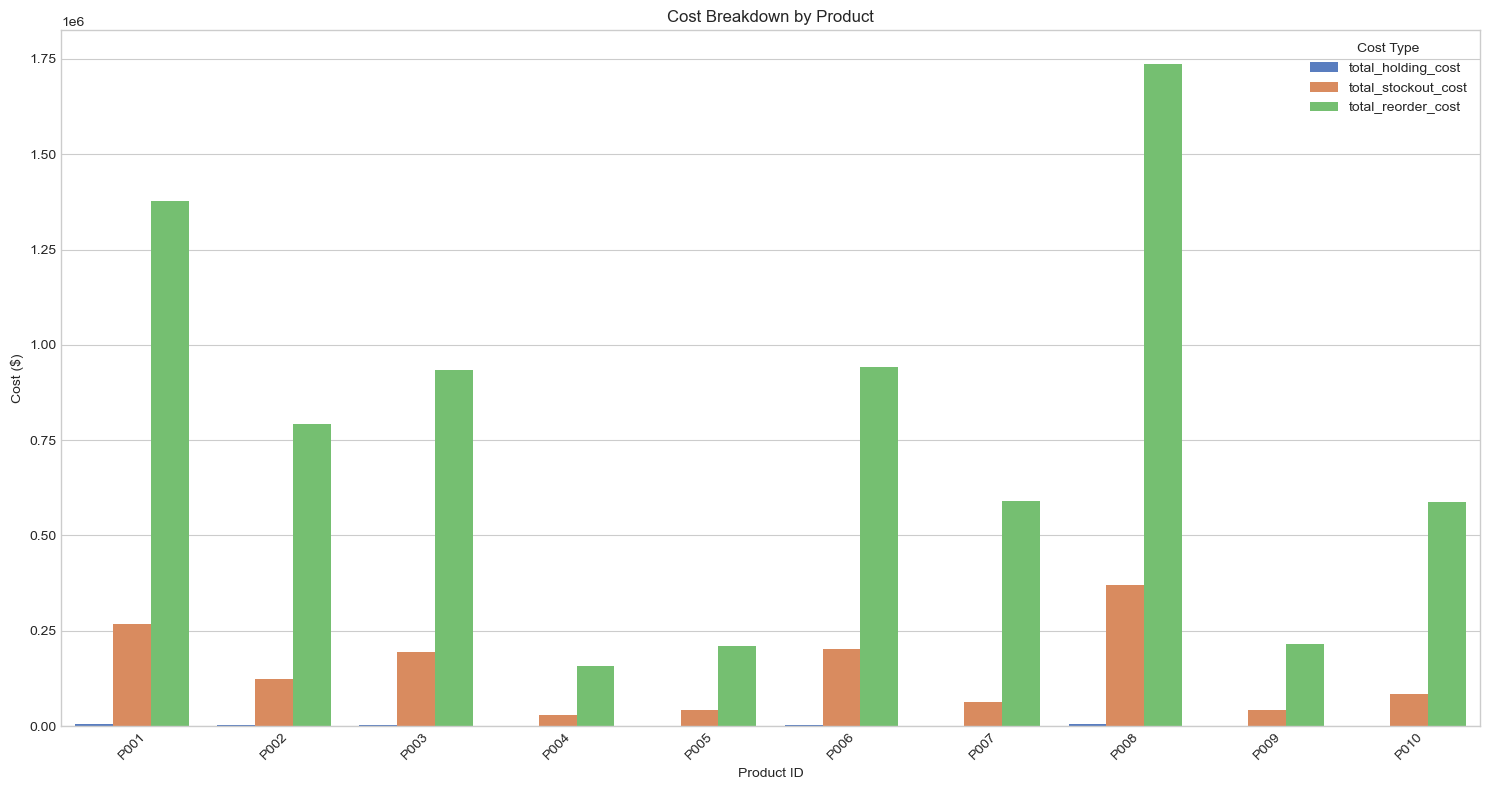

In [11]:
# Calculate costs by product
holding_costs = inventory_levels.groupby('product_id')['cost'].sum().reset_index()
holding_costs.columns = ['product_id', 'total_holding_cost']

stockout_costs = inventory_levels.groupby('product_id')['stockout_cost'].sum().reset_index()
stockout_costs.columns = ['product_id', 'total_stockout_cost']

reorder_costs = reorders.groupby('product_id')['cost'].sum().reset_index()
reorder_costs.columns = ['product_id', 'total_reorder_cost']

# Combine all costs
cost_summary = pd.merge(holding_costs, stockout_costs, on='product_id')
cost_summary = pd.merge(cost_summary, reorder_costs, on='product_id')
cost_summary['total_cost'] = cost_summary['total_holding_cost'] + cost_summary['total_stockout_cost'] + cost_summary['total_reorder_cost']

# Plot cost breakdown by product
cost_breakdown = pd.melt(cost_summary, 
                        id_vars=['product_id'],
                        value_vars=['total_holding_cost', 'total_stockout_cost', 'total_reorder_cost'],
                        var_name='cost_type',
                        value_name='cost')

plt.figure(figsize=(15, 8))
sns.barplot(x='product_id', y='cost', hue='cost_type', data=cost_breakdown)
plt.title('Cost Breakdown by Product')
plt.xlabel('Product ID')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.legend(title='Cost Type')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Inventory Performance Metrics by Product:


product_id  avg_inventory  inventory_turnover  days_of_supply  \
0       P001     159.590411          194.880130        1.872946   
1       P002     124.549315          283.807261        1.286084   
2       P003     108.556164          368.767635        0.989783   
3       P004     111.905479          259.996205        1.403867   
4       P005     101.253425          311.080836        1.173328   
5       P006     106.834247          405.768762        0.899527   
6       P007     124.782192          261.752094        1.394449   
7       P008     141.701370          232.580673        1.569348   
8       P009      87.887671          399.168615        0.914401   
9       P010     118.006849          308.575309        1.182855   

   stockout_rate  avg_order_quantity        product_name     category  
0       0.238356           98.668033  Electronics Item 1  Electronics  
1       0.276712          100.058182   Home Goods Item 2   Home Goods  
2       0.305479          100.729730   Home Goods Item 3   Home Goods  
3       0.209589           99.784232         Food Item 4         Food  
4       0.230137           99.237548         Food Item 5         Food  
5       0.316438           98.783951   Home Goods Item 6   Home Goods  
6       0.247945          100.058140     Clothing Item 7     Clothing  
7       0.256164          100.762646  Electronics Item 8  Electronics  
8       0.260274           98.348592         Food Item 9         Food  
9       0.279452          100.320285    Clothing Item 10     Clothing

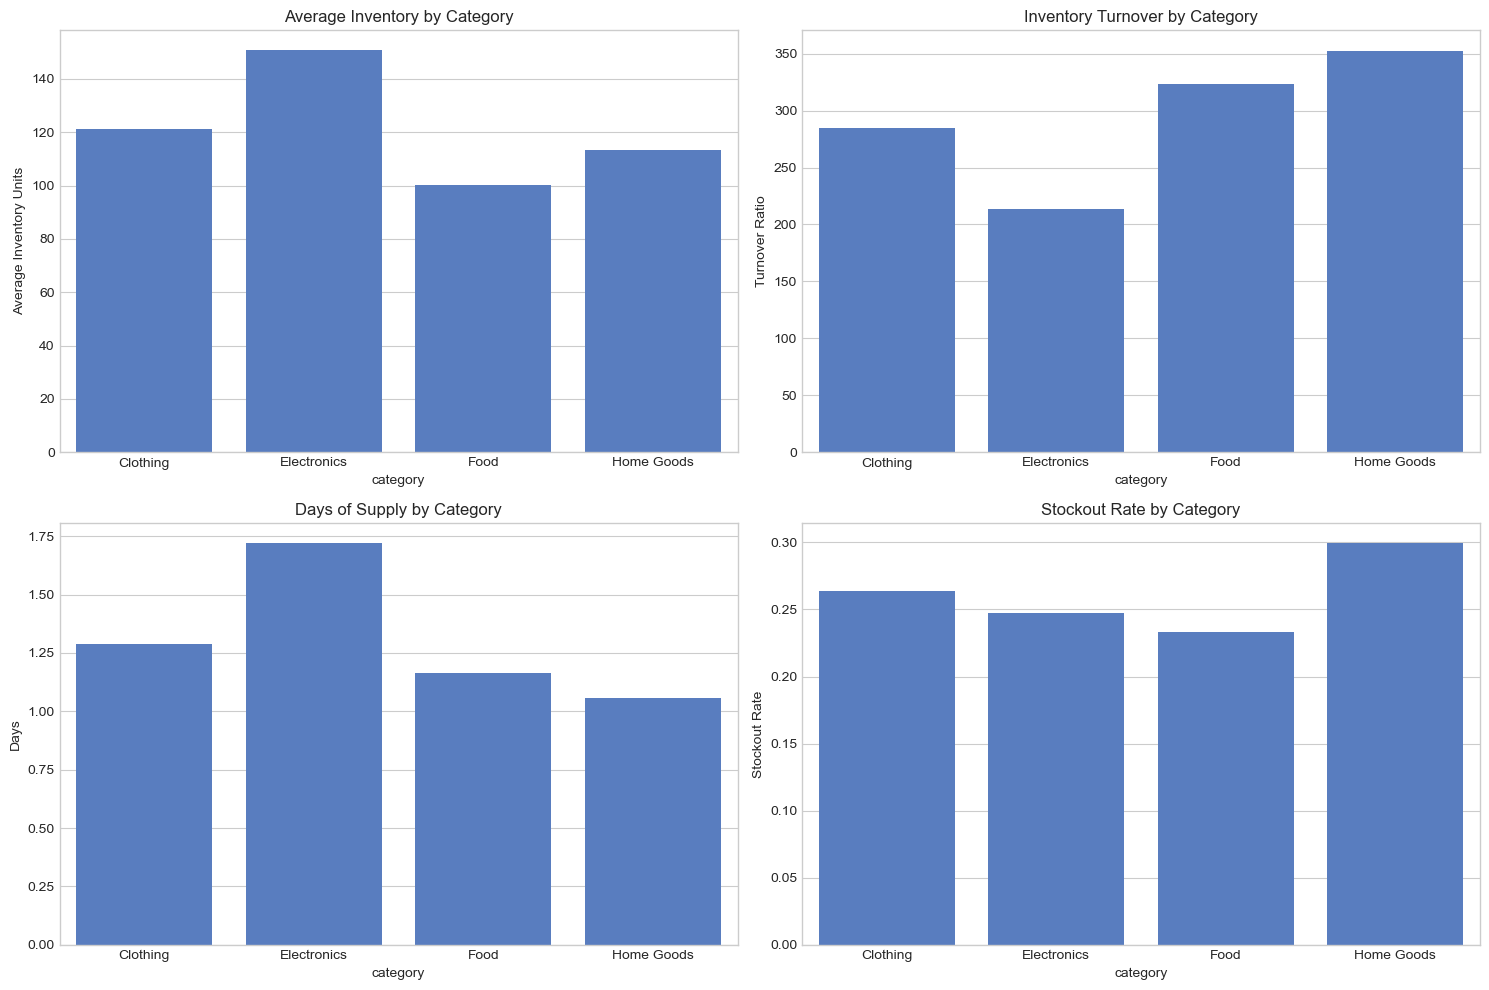

In [12]:
# Calculate some key inventory metrics by product
inventory_metrics = []

for product_id in products_df['product_id']:
    product_inventory = inventory_levels[inventory_levels['product_id'] == product_id]
    product_sales = sales_df[sales_df['product_id'] == product_id]
    
    # Calculate average inventory level
    avg_inventory = product_inventory['quantity'].mean()
    
    # Calculate inventory turnover ratio
    total_demand = product_sales['demand'].sum()
    inventory_turnover = total_demand / avg_inventory if avg_inventory > 0 else 0
    
    # Calculate days of supply
    days_of_supply = 365 / inventory_turnover if inventory_turnover > 0 else 0
    
    # Calculate stockout rate
    stockout_days = product_inventory['stockout'].sum()
    stockout_rate = stockout_days / len(product_inventory) if len(product_inventory) > 0 else 0
    
    # Calculate average order quantity
    product_reorders = reorders[reorders['product_id'] == product_id]
    avg_order_quantity = product_reorders['quantity'].mean() if not product_reorders.empty else 0
    
    inventory_metrics.append({
        'product_id': product_id,
        'avg_inventory': avg_inventory,
        'inventory_turnover': inventory_turnover,
        'days_of_supply': days_of_supply,
        'stockout_rate': stockout_rate,
        'avg_order_quantity': avg_order_quantity
    })

inventory_metrics_df = pd.DataFrame(inventory_metrics)

# Merge with product information
inventory_metrics_df = pd.merge(inventory_metrics_df, products_df[['product_id', 'product_name', 'category']], on='product_id')

# Display the metrics
print("\nInventory Performance Metrics by Product:")
display(inventory_metrics_df)

# Plot key metrics by product category
metrics_by_category = inventory_metrics_df.groupby('category').agg({
    'avg_inventory': 'mean',
    'inventory_turnover': 'mean',
    'days_of_supply': 'mean',
    'stockout_rate': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot average inventory by category
sns.barplot(x='category', y='avg_inventory', data=metrics_by_category, ax=axes[0, 0])
axes[0, 0].set_title('Average Inventory by Category')
axes[0, 0].set_ylabel('Average Inventory Units')
axes[0, 0].grid(True, axis='y')

# Plot inventory turnover by category
sns.barplot(x='category', y='inventory_turnover', data=metrics_by_category, ax=axes[0, 1])
axes[0, 1].set_title('Inventory Turnover by Category')
axes[0, 1].set_ylabel('Turnover Ratio')
axes[0, 1].grid(True, axis='y')

# Plot days of supply by category
sns.barplot(x='category', y='days_of_supply', data=metrics_by_category, ax=axes[1, 0])
axes[1, 0].set_title('Days of Supply by Category')
axes[1, 0].set_ylabel('Days')
axes[1, 0].grid(True, axis='y')

# Plot stockout rate by category
sns.barplot(x='category', y='stockout_rate', data=metrics_by_category, ax=axes[1, 1])
axes[1, 1].set_title('Stockout Rate by Category')
axes[1, 1].set_ylabel('Stockout Rate')
axes[1, 1].grid(True, axis='y')

plt.tight_layout()
plt.show()

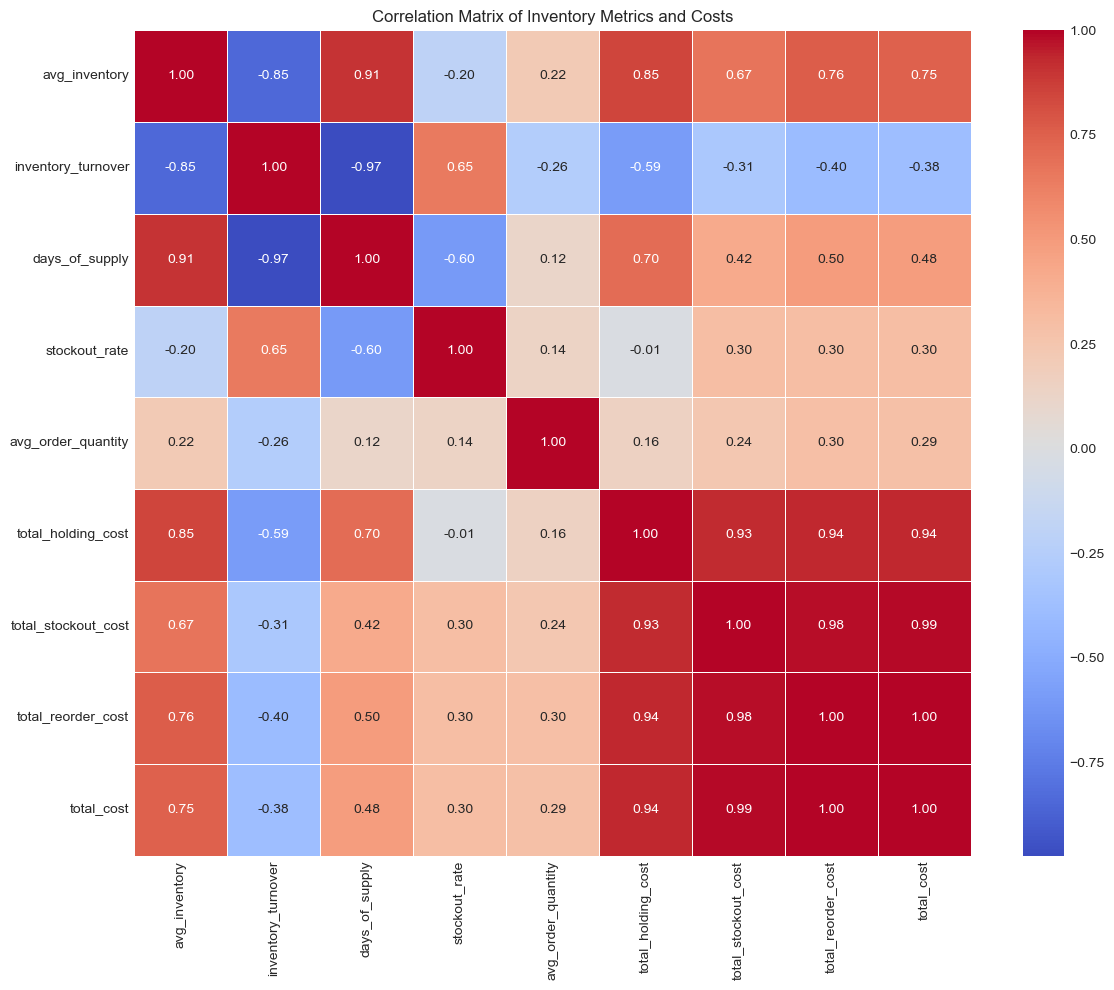

In [13]:
# Visualize correlations
# Create a correlation matrix of key metrics
correlation_data = pd.merge(
    inventory_metrics_df,
    cost_summary,
    on='product_id'
)

# Select numerical columns for correlation
correlation_columns = ['avg_inventory', 'inventory_turnover', 'days_of_supply', 
                      'stockout_rate', 'avg_order_quantity',
                      'total_holding_cost', 'total_stockout_cost', 
                      'total_reorder_cost', 'total_cost']

correlation_matrix = correlation_data[correlation_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Inventory Metrics and Costs')
plt.tight_layout()
plt.show()

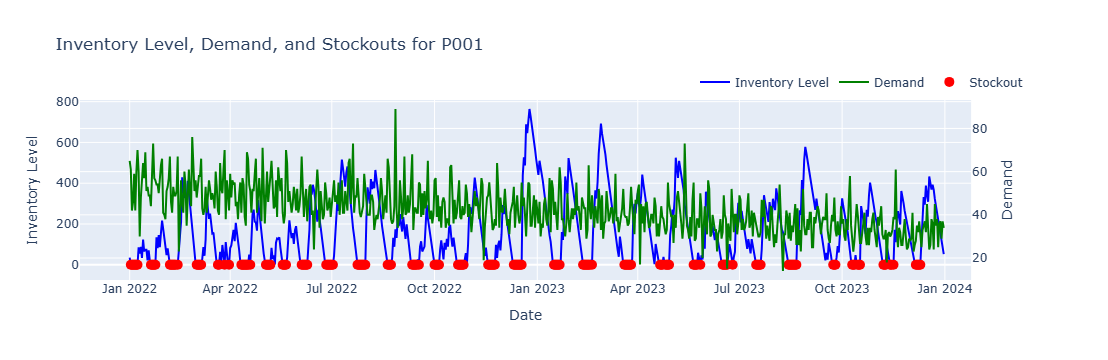

In [14]:
# Interactive visualization with Plotly
# Create a time series of inventory levels and stockouts
product_id = products_df['product_id'].iloc[0]  # Just pick the first product for this example
product_inventory = inventory_levels[inventory_levels['product_id'] == product_id]
product_sales = sales_df[sales_df['product_id'] == product_id]

# Merge inventory and sales data
product_data = pd.merge(
    product_inventory[['date', 'quantity', 'stockout']],
    product_sales[['date', 'demand']],
    on='date',
    how='left'
)

# Create the figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add inventory level
fig.add_trace(
    go.Scatter(x=product_data['date'], y=product_data['quantity'], 
              name='Inventory Level', mode='lines', line=dict(color='blue')),
    secondary_y=False,
)

# Add demand
fig.add_trace(
    go.Scatter(x=product_data['date'], y=product_data['demand'], 
              name='Demand', mode='lines', line=dict(color='green')),
    secondary_y=True,
)

# Add stockout events
stockout_dates = product_data[product_data['stockout'] == True]['date']
fig.add_trace(
    go.Scatter(x=stockout_dates, y=[0] * len(stockout_dates), 
              name='Stockout', mode='markers', marker=dict(color='red', size=10)),
    secondary_y=False,
)

# Update layout
fig.update_layout(
    title=f'Inventory Level, Demand, and Stockouts for {product_id}',
    xaxis_title='Date',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set y-axes titles
fig.update_yaxes(title_text="Inventory Level", secondary_y=False)
fig.update_yaxes(title_text="Demand", secondary_y=True)

fig.show()

In [15]:
# Save some key dataframes for later use
inventory_metrics_df.to_csv('../data/inventory_metrics.csv', index=False)
cost_summary.to_csv('../data/cost_summary.csv', index=False)
print("EDA complete!")

EDA complete!
